# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Pandas (3)</p>

<div class="alert alert-block alert-info alert">

# <span style=" color:red">Pandas: Dealing with Missing Data 

## Table of Contents
**What is missing Data and how can we deal with it?**

**Check and Select Missing Values**

**Drop Data**

* dropna()
  
**Fill in the Data**
  
* fillna()
* interpolate()
* bfill()
* ffill()

### What is missing Data and how can we deal with it?
#### Missing Data
* We need to prepare our data for statistical or Machine Learning models to achieve better results. Dealing with missing data is one of these steps and crucial to implement these models.
* Pandas display them as **NaN** values.
* There are also newer specialized null pandas values such as **pd.NaT** to imply the value missing should be a **timestamp**.

#### Options for missing data
Depending on the situation we encounter, we can ...
* 1-Keep them
* 2-Remove them
* 3-Replace them

#### 1- Keeping the missing data
* Easiest to do
* Does not manipulate or change the true data
* However, many methods do not support NaN
* There may be some reasonable guesses to fill these values, so it would be better to find a way to remove or replace these missing data
#### 2- Dropping or Removing the missing data
* Easy to do
* Can be based on some rules
* However, we may loes a lot of daya or useful information
##### Dropping a Row
* Makes sense when a lot of info is missing
* For example, in the table below, it is reasonable to remove USA as a row because there are lots of misssing data in this row.
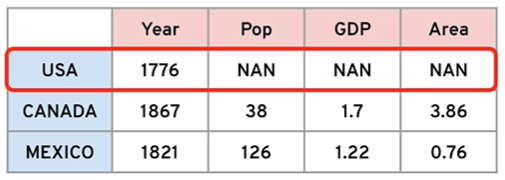
##### Dropping a Column (Feature)
* Good choice if most of the rows have missing values in a feature
* In the example below, it is better to drop Area column instead of USA and CANADA rows  
   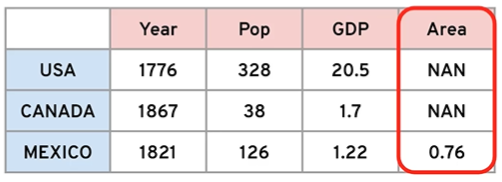
#### 3- Filling in the missing data
* Potential to save a lot of data for use especially in training a ML model
* However, it is hardest to do and somewhat arbitrary
* It has a potential to lead to false conclusions
##### Fill with same value
* Good choice if NaN was a placeholder
* In the example below the NaN values are actually "0". So we can replace them with 0.  
  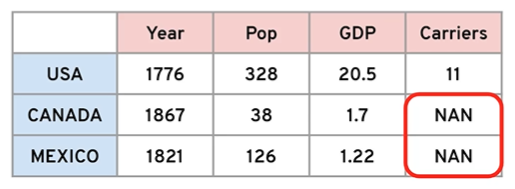
##### Fill with interpolated or estimated value
* Much harder and requires reasonable assumptions and domain knowledge
* In the example below, we can guess that the Percentage NaN value for CANADA should be between USA and MEXICO: so it should be 50%
* There are also some other methods to fill in the missing data, such as filling with mean, median, the value before or after...
  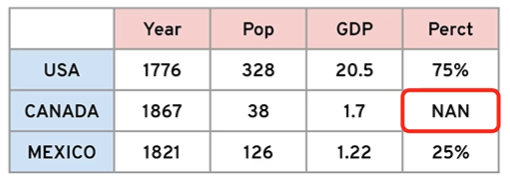

#### Null/NA/nan objects

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Null values are displayed as "nan"
np.nan

nan

In [3]:
# In new version of Pandas
pd.NA

<NA>

In [4]:
# For timestamps
pd.NaT

NaT

In [5]:
# This comparison looks like true but actually not
np.nan == np.nan

# Since the missing values cannot be known, they are not equal.

False

In [6]:
# But this argument is True
np.nan is np.nan

True

In [7]:
myvar = np.nan

In [8]:
myvar is np.nan

True

### Data

In [9]:
# Let's read our csv data set to handle missing values
df = pd.read_csv("movie_scores.csv")

In [10]:
df

first_name last_name   age  sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0    m              8.0              10.0
1        NaN       NaN   NaN  NaN              NaN               NaN
2       Hugh   Jackman  51.0    m              NaN               NaN
3      Oprah   Winfrey  66.0    f              6.0               8.0
4       Emma     Stone  31.0    f              7.0               9.0

### Check and Select Missing Values

In [11]:
# We can see Null values as boolean by using "isnull()"
df.isnull()

first_name  last_name    age    sex  pre_movie_score  post_movie_score
0       False      False  False  False            False             False
1        True       True   True   True             True              True
2       False      False  False  False             True              True
3       False      False  False  False            False             False
4       False      False  False  False            False             False

In [12]:
# The opposite argument is "notnull()"
df.notnull()

first_name  last_name    age    sex  pre_movie_score  post_movie_score
0        True       True   True   True             True              True
1       False      False  False  False            False             False
2        True       True   True   True            False             False
3        True       True   True   True             True              True
4        True       True   True   True             True              True

In [13]:
df[df['first_name'].notnull()]

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
2       Hugh   Jackman  51.0   m              NaN               NaN
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

##### Q1: Find all the actors who do not have missing values in the "pre_movie_score" column

In [14]:
df["pre_movie_score"].notnull()

# "True"s give the not misiing values

0     True
1    False
2    False
3     True
4     True
Name: pre_movie_score, dtype: bool

In [15]:
# To see the whole rows and columns with not null values...
df[df["pre_movie_score"].notnull()]

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

##### Q2: Find actors hose pre movie scores are missing but they have values in "sex" columns

In [16]:
# First argument
df[df["pre_movie_score"].isnull()]

first_name last_name   age  sex  pre_movie_score  post_movie_score
1        NaN       NaN   NaN  NaN              NaN               NaN
2       Hugh   Jackman  51.0    m              NaN               NaN

In [17]:
# The second argument
df[df["sex"].notnull()]

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
2       Hugh   Jackman  51.0   m              NaN               NaN
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

In [18]:
# Combine these arguments using AND operator
df[(df["pre_movie_score"].isnull()) & (df["sex"].notnull())]

first_name last_name   age sex  pre_movie_score  post_movie_score
2       Hugh   Jackman  51.0   m              NaN               NaN

### Drop Data

In [19]:
# Check how it is used (see axis (columns or rows), any/all, threshold, subset and other parameters)
help(df.dropna)

Help on method dropna in module pandas.core.frame:

dropna(*, axis: 'Axis' = 0, how: 'AnyAll | lib.NoDefault' = <no_default>, thresh: 'int | lib.NoDefault' = <no_default>, subset: 'IndexLabel | None' = None, inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA

#### dropna()
* It drops any rows with missing values
* Use axis or threshold parameters to limit it
* To make this change permanent, assign it to the data frame itself

In [20]:
df.dropna()  # it drops all rows with null values

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

In [21]:
df.dropna(thresh=1)

# If keeps the rows, if there is one value which is not null. So it removes rows in which all values are missing

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
2       Hugh   Jackman  51.0   m              NaN               NaN
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

In [22]:
df.dropna(thresh=5)
# Remove after 5 non-missing values. 
# For example in the second index, there are 4 not missing and 2 missing values. It will remove Hugh Jackman row

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

In [23]:
# By default axis=0 (rows)
# Use axis=1 if you want to drop columns.
# But without column name it will drop every column, that is, everything

df.dropna(axis=1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [24]:
df.dropna(thresh=4,axis=1)

first_name last_name   age  sex
0        Tom     Hanks  63.0    m
1        NaN       NaN   NaN  NaN
2       Hugh   Jackman  51.0    m
3      Oprah   Winfrey  66.0    f
4       Emma     Stone  31.0    f

In [25]:
# use column names with subset
df.dropna(subset=["last_name"])

# Drop last names having missing values. It focuses on last_name column in this case
# Althoug there are null values in Hugh Jackman, it keeps it because its last_name is not null

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
2       Hugh   Jackman  51.0   m              NaN               NaN
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

In [26]:
# Let's try pre_movie_score with subset

df.dropna(subset=["pre_movie_score"])

first_name last_name   age sex  pre_movie_score  post_movie_score
0        Tom     Hanks  63.0   m              8.0              10.0
3      Oprah   Winfrey  66.0   f              6.0               8.0
4       Emma     Stone  31.0   f              7.0               9.0

### Fiil in the Data

In [27]:
# check its usage
help(df.fillna)

Help on method fillna in module pandas.core.generic:

fillna(value: 'Hashable | Mapping | Series | DataFrame | None' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool_t' = False, limit: 'int | None' = None, downcast: 'dict | None | lib.NoDefault' = <no_default>) -> 'Self | None' method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series:
    
        * ffill: propagate last valid observation forward to next

#### fillna()

In [28]:
# Fill in all missing data 
df.fillna("New")

first_name last_name   age  sex pre_movie_score post_movie_score
0        Tom     Hanks  63.0    m             8.0             10.0
1        New       New   New  New             New              New
2       Hugh   Jackman  51.0    m             New              New
3      Oprah   Winfrey  66.0    f             6.0              8.0
4       Emma     Stone  31.0    f             7.0              9.0

##### Q3: Fill in all missing values in pre_movie_score column with "0"

In [29]:
df["pre_movie_score"].fillna(0) # Without "" because "" makes the numbers string

0    8.0
1    0.0
2    0.0
3    6.0
4    7.0
Name: pre_movie_score, dtype: float64

In [30]:
# If we want to make this change permanent...
# df["pre_movie_score"] = df["pre_movie_score"].fillna(0)

In [31]:
# df

##### Q4: Replace missing values in the post_movie_score column with with the "mean" value of this column

In [32]:
# Let's find the mean of post_movie_score column first
df["post_movie_score"].mean()

9.0

In [33]:
# And fill in thse values with the mean
df["post_movie_score"]. fillna(df["post_movie_score"].mean())  # Yet it is not a permanent change

0    10.0
1     9.0
2     9.0
3     8.0
4     9.0
Name: post_movie_score, dtype: float64

In [34]:
# If we want to replace every null values in numeric columns...
# df.fillna(df.mean())

#### Filling with the interpolation method

In [35]:
# Let's create a small series for interpolation
airline_tix = {'first':100,'business':np.nan,'economy-plus':50,'economy':30}

In [36]:
ser = pd.Series(airline_tix)
ser

first           100.0
business          NaN
economy-plus     50.0
economy          30.0
dtype: float64

In [37]:
ser.interpolate()

first           100.0
business         75.0
economy-plus     50.0
economy          30.0
dtype: float64

In [38]:
# Make it a dataframe and use interpolate method
df = pd.DataFrame(ser,columns=['Price'])
df

Price
first         100.0
business        NaN
economy-plus   50.0
economy        30.0

In [39]:
df.interpolate()

Price
first         100.0
business       75.0
economy-plus   50.0
economy        30.0

In [40]:
df = df.reset_index()
df

index  Price
0         first  100.0
1      business    NaN
2  economy-plus   50.0
3       economy   30.0

In [41]:
# Interpolate using the order
df.interpolate(method='spline',order=2)  # Price column

C:\Users\admin\AppData\Local\Temp\ipykernel_7172\2689630826.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='spline',order=2)  # Price column


index       Price
0         first  100.000000
1      business   73.333333
2  economy-plus   50.000000
3       economy   30.000000

#### Backward filling: bfill()

NaN values take the value of the following row.

Syntax: DataFrame.bfill(axis=None, inplace=False, limit=None, downcast=None)

Parameters:

axis: rows or columns

inplace: boolean, default False

limit: integer value, No of consecutive na cells to be populatedated.

In [42]:

# Let's create a dataframe with "na" values. 
  
df_sample = pd.DataFrame({"A":[None, 1, 2, 3, None, None],  
                   "B":[11, 5, None, None, None, 8], 
                   "C":[None, 5, 10, 11, None, 8]}) 
  
df_sample

A     B     C
0  NaN  11.0   NaN
1  1.0   5.0   5.0
2  2.0   NaN  10.0
3  3.0   NaN  11.0
4  NaN   NaN   NaN
5  NaN   8.0   8.0

In [43]:
# Fill across the row 
df_sample.bfill(axis ='rows') 

A     B     C
0  1.0  11.0   5.0
1  1.0   5.0   5.0
2  2.0   8.0  10.0
3  3.0   8.0  11.0
4  NaN   8.0   8.0
5  NaN   8.0   8.0

In [44]:
# Let's apply it to our df
df

index  Price
0         first  100.0
1      business    NaN
2  economy-plus   50.0
3       economy   30.0

In [45]:
df.bfill()
# business had NaN vaalue but was filled with the value of economy-plus (50)

index  Price
0         first  100.0
1      business   50.0
2  economy-plus   50.0
3       economy   30.0

#### Forward filling: ffill()
NaN values take the value of the previous row. Syntax is the same as bfill()

In [46]:
df_sample.ffill()

# NaN values was filled by the previous values

A     B     C
0  NaN  11.0   NaN
1  1.0   5.0   5.0
2  2.0   5.0  10.0
3  3.0   5.0  11.0
4  3.0   5.0  11.0
5  3.0   8.0   8.0

In [47]:
df.ffill()

# NaN value in business took the value of the first (100)
# This is not a permanent change yet

index  Price
0         first  100.0
1      business  100.0
2  economy-plus   50.0
3       economy   30.0